# Training

- Use this notebook after you've built your dataset to train the model.
- Training will create a model directory with:
    - **`model_0000XXX.pth`**: weights that are regularly saved during training
    - **`config.yaml`**: the model configuration used during the last training performed.
    - **`training.log`**: a log file that contains all the logs displayed in the notebook during training (useful if you close your notebook during a long training session).

In [1]:
%env CUDA_VISIBLE_DEVICES=0
%load_ext autoreload
%autoreload 2
%matplotlib inline

from pathlib import Path
import logging

import matplotlib.pyplot as plt
import numpy as np

import sys; sys.path.append("../")
import maskflow

root_dir = Path("/home/hadim/.data/Neural_Network/Maskflow/Microtubule")
data_dir = root_dir / "Data"
model_dir = root_dir / "Models"
model_dir.mkdir(exist_ok=True)

# Import the configuration associated with this dataset and network.
config = maskflow.config.load_config(root_dir / "config.yaml")

env: CUDA_VISIBLE_DEVICES=0


/home/hadim/conda/envs/nn/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


## Check Dataset

2018-11-10 16:39:26,235:WARNING:maskrcnn_benchmark.data.build: When using more than one image per GPU you may encounter an out-of-memory (OOM) error if your GPU does not have sufficient memory. If this happens, you can reduce SOLVER.IMS_PER_BATCH (for training) or TEST.IMS_PER_BATCH (for inference). For training, you must also adjust the learning rate and schedule length according to the linear scaling rule. See for example: https://github.com/facebookresearch/Detectron/blob/master/configs/getting_started/tutorial_1gpu_e2e_faster_rcnn_R-50-FPN.yaml#L14


loading annotations into memory...
Done (t=6.03s)
creating index...
index created!


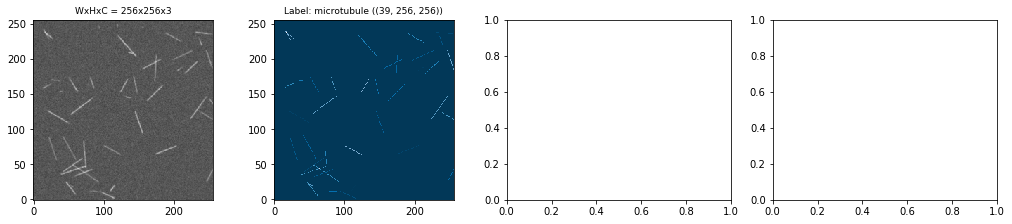

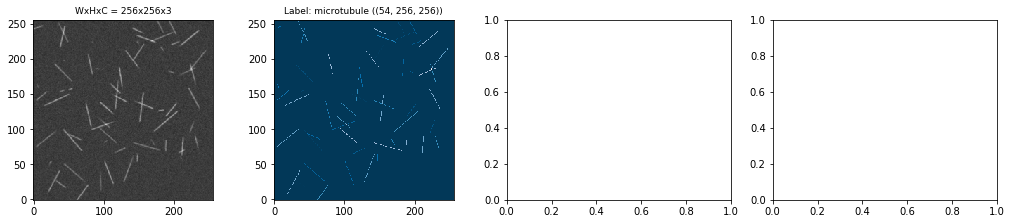

In [2]:
config['SOLVER']['IMS_PER_BATCH'] = 2
n_batch = 1

# Load some data
data_loader = maskflow.dataset.get_data_loader(config, data_dir, is_train=True)
some_data = [iter(data_loader).next() for _ in range(n_batch)]

# Retrieve category's names
categories = data_loader.dataset.coco.cats

for batch_image, batch_target, batch_idx in some_data:
    maskflow.viz.batch_display_top_masks(batch_image, batch_target, batch_idx, categories,
                                         basesize=14, limit=3, cmap="PuBu_r",
                                         pixel_mean=config['INPUT']['PIXEL_MEAN'],
                                         pixel_std=config['INPUT']['PIXEL_STD'])

## Training

In [3]:
# Configure the training
config['DATA_DIR'] = str(data_dir)

config['MODEL']['DEVICE'] = "cuda"

config['DATALOADER']['NUM_WORKERS'] = 16
config['SOLVER']['IMS_PER_BATCH'] = 8

# Disable those settings if you want to use the training
# parameters from your config file.
custom_training = True
if custom_training:
    max_iter = 2500
    config['SOLVER']['MAX_ITER'] = max_iter
    config['SOLVER']['BASE_LR'] = 0.0025
    config['SOLVER']['STEPS'] = [int(max_iter * 0.66), int(max_iter * 0.9)]
    config['SOLVER']['CHECKPOINT_PERIOD'] = 250
    config['SOLVER']['WARMUP_ITERS'] = 500

#config['SOLVER']

In [4]:
# Setup training

# Use the last model in the model dir
# If False, create a new model from scratch.
# If `model_to_use` is set, we use this one instead.

builder_args = {}
builder_args['config'] = config
builder_args['model_dir'] = model_dir
builder_args['use_last_model'] = False
builder_args['model_to_use'] = None
builder_args['use_pretrained_weights'] = True

training_args = maskflow.training.build_model(**builder_args)

2018-11-10 16:39:38,609:INFO:root: Training model directory set: /home/hadim/.data/Neural_Network/Maskflow/Microtubule/Models/2018.11.10-16:39:38
2018-11-10 16:39:38,610:INFO:root: Building the model...
2018-11-10 16:40:25,112:INFO:root: Use pretrained weights from https://download.pytorch.org/models/maskrcnn/e2e_mask_rcnn_R_50_FPN_1x.pth
2018-11-10 16:40:31,059:INFO:maskrcnn_benchmark.utils.checkpoint: No checkpoint found. Initializing model from scratch
2018-11-10 16:40:31,062:INFO:maskrcnn_benchmark.utils.checkpoint: Saving checkpoint to /home/hadim/.data/Neural_Network/Maskflow/Microtubule/Models/2018.11.10-16:39:38/model_0000000.pth
2018-11-10 16:40:31,558:INFO:root: Create the data loader.
2018-11-10 16:40:31,559:WARNING:maskrcnn_benchmark.data.build: When using more than one image per GPU you may encounter an out-of-memory (OOM) error if your GPU does not have sufficient memory. If this happens, you can reduce SOLVER.IMS_PER_BATCH (for training) or TEST.IMS_PER_BATCH (for infere

loading annotations into memory...
Done (t=6.80s)
creating index...
index created!


2018-11-10 16:40:38,734:INFO:root: Model ready to be trained.


In [ ]:
# Run training

training_args['log_period'] = 20
training_args['log_losses_detailed'] = False
training_args['save_metrics'] = True
training_args['tensorboard'] = True
training_args['tensorboard_log_period'] = 10

maskflow.training.do_train(**training_args)

2018-11-10 16:40:38,767:INFO:maskfow.training: Start training at iteration 0
2018-11-10 16:40:38,953:INFO:maskfow.training: tensorboard --logdir /home/hadim/.data/Neural_Network/Maskflow/Microtubule/Models/2018.11.10-16:39:38/logs
2018-11-10 16:40:38,955:INFO:maskfow.training: Training will stop at 2500
2018-11-10 16:40:45,864:INFO:maskfow.training: Step: 0 | Loss: 10.686350 | ETA: 4:32:44 | LR: 0.000825 | Memory: 2956 MB
2018-11-10 16:41:35,619:INFO:maskfow.training: Step: 20 | Loss: 1.912217 | ETA: 1:51:04 | LR: 0.000892 | Memory: 4444 MB
2018-11-10 16:42:23,210:INFO:maskfow.training: Step: 40 | Loss: 1.734153 | ETA: 1:43:56 | LR: 0.000959 | Memory: 4949 MB
2018-11-10 16:43:35,810:INFO:maskfow.training: Step: 60 | Loss: 1.632216 | ETA: 1:57:35 | LR: 0.001026 | Memory: 5305 MB
2018-11-10 16:44:37,960:INFO:maskfow.training: Step: 80 | Loss: 1.698495 | ETA: 1:58:47 | LR: 0.001093 | Memory: 5525 MB
2018-11-10 16:45:36,259:INFO:maskfow.training: Step: 100 | Loss: 1.518054 | ETA: 1:57:34 |